In [1]:
from os import sys
sys.path.append("/meshAfterParty/")
from importlib import reload

import datajoint as dj
from pathlib import Path

import datajoint_utils as du
du = reload(du)

import time

WARNING - 2020-11-18 22:29:14,731 - trimesh_repair - Need to pip install annotationframeworkclient to repair mesh with pychunkedgraph
WARNING - 2020-11-18 22:29:14,732 - trimesh_io - Need to pip install annotationframeworkclient to use dataset_name parameters
INFO - 2020-11-18 22:29:14,918 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2020-11-18 22:29:14,919 - settings - Setting database.user to celiib
INFO - 2020-11-18 22:29:14,920 - settings - Setting database.password to newceliipass


In [2]:
import minfig
du.config_celii()
du.set_minnie65_config_segmentation(minfig)
du.print_minnie65_config_paths(minfig)

#configuring will include the adapters
minnie,schema = du.configure_minnie_vm()

INFO - 2020-11-18 22:29:14,931 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2020-11-18 22:29:14,932 - settings - Setting database.user to celiib
INFO - 2020-11-18 22:29:14,933 - settings - Setting database.password to newceliipass
INFO - 2020-11-18 22:29:14,937 - settings - Setting stores to {'minnie65': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65', 'stage': '/mnt/dj-stor01/platinum/minnie65'}, 'meshes': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/meshes', 'stage': '/mnt/dj-stor01/platinum/minnie65/02/meshes'}, 'decimated_meshes': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/decimated_meshes', 'stage': '/mnt/dj-stor01/platinum/minnie65/02/decimated_meshes'}, 'skeletons': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/skeletons'}}
INFO - 2020-11-18 22:29:14,938 - settings - Setting enable_python_native_blobs to True
INFO - 2020-11-18 22:29:14,947 - connection - Connect

Current path for external_segmentation_path = /mnt/dj-stor01/platinum/minnie65/02
Current path for external_mesh_path = /mnt/dj-stor01/platinum/minnie65/02/meshes
Current path for external_decimated_mesh_path = /mnt/dj-stor01/platinum/minnie65/02/decimated_meshes
Current path for external_skeleton_path = /mnt/dj-stor01/platinum/minnie65/02/skeletons
Connecting celiib@at-database.ad.bcm.edu:3306


# doing the soma extraction

In [72]:
segment_id = 864691134831878402
segment_id = 864691134832796418
segment_id = 864691134832832258
segment_id = 864691134834082058
segment_id = 864691134858415181
segment_id = 864691134862564098

In [73]:
import neuron_visualizations as nviz
new_mesh = du.fetch_segment_id_mesh(segment_id)
# nviz.plot_objects(new_mesh)

# Doing the soma extraction

In [74]:
import soma_extraction_utils as sm

In [75]:
soma_info = sm.extract_soma_center(segment_id=segment_id,
    current_mesh_verts=new_mesh.vertices,
    current_mesh_faces=new_mesh.faces)

Current Arguments Using (adjusted for decimation):
 large_mesh_threshold= 15000.0 
large_mesh_threshold_inner = 10000.0 
soma_size_threshold = 937.5 
soma_size_threshold_max = 12000.0
outer_decimation_ratio = 0.25
inner_decimation_ratio = 0.25
xvfb-run -n 4121 -s "-screen 0 800x600x24" meshlabserver $@  -i /notebooks/Platinum_Datajoint/Soma_Extraction/864691134862564098/neuron_864691134862564098.off -o /notebooks/Platinum_Datajoint/Soma_Extraction/864691134862564098/neuron_864691134862564098_decimated.off -s /notebooks/Platinum_Datajoint/Soma_Extraction/864691134862564098/decimation_meshlab_25322111.mls
Total found significant pieces before Poisson = [<trimesh.Trimesh(vertices.shape=(11236, 3), faces.shape=(24089, 3))>]
----- working on large mesh #0: <trimesh.Trimesh(vertices.shape=(11236, 3), faces.shape=(24089, 3))>
remove_inside_pieces requested 
xvfb-run -n 8797 -s "-screen 0 800x600x24" meshlabserver $@  -i /notebooks/Platinum_Datajoint/Soma_Extraction/temp/neuron_71550.off -o /n

In [76]:
nviz.plot_objects(meshes=soma_info[0])

Exception: No meshes or skeletons passed to the plotting funciton

In [77]:
nviz.plot_objects(new_mesh)

In [39]:
import neuron

In [42]:
import compartment_utils as cu
from importlib import reload
cu = reload(cu)

In [55]:
neuron_obj = neuron.Neuron(mesh=new_mesh,
                          segment_id=segment_id,
                          description="small_error",
                          somas=soma_info,
                          suppress_preprocessing_print=False)

--- 0) Having to preprocess the Neuron becuase no preprocessed data
Please wait this could take a while.....
Skipping the hole filling
use_meshafterparty = True
Using pre-computed somas: soma_mesh_list = [<trimesh.Trimesh(vertices.shape=(1556, 3), faces.shape=(2960, 3))>]
Soma List = [<trimesh.Trimesh(vertices.shape=(1556, 3), faces.shape=(2960, 3))>]
soma_mesh_list_centers = [array([1416305.79177378,  928903.84203085,  674371.02345758])]
xvfb-run -n 1472 -s "-screen 0 800x600x24" meshlabserver $@  -i /notebooks/Platinum_Datajoint/Soma_Extraction/temp/neuron_70578.off -o /notebooks/Platinum_Datajoint/Soma_Extraction/temp/neuron_70578_fill_holes.off -s /notebooks/Platinum_Datajoint/Soma_Extraction/temp/fill_holes_880198.mls
removed temporary input file: /notebooks/Platinum_Datajoint/Soma_Extraction/temp/neuron_70578.off
removed temporary output file: /notebooks/Platinum_Datajoint/Soma_Extraction/temp/neuron_70578_fill_holes.off
/notebooks/Platinum_Datajoint/Soma_Extraction/temp/fill_hol

  0%|          | 0/1 [00:00<?, ?it/s]

Total time for mesh_pieces_connectivity= 0.7209830284118652
# of insignificant_limbs = 0 with trimesh : []
# of not_processed_soma_containing_meshes = 0 with trimesh : []


----- Working on Proper Limb # 0 ---------
meshparty_segment_size = 100
Time for preparing soma vertices and root: 5.0067901611328125e-06
cc_vertex_thresh = 10


100%|██████████| 1/1 [00:00<00:00,  4.93it/s]


Time for 1st pass MP skeletonization: 0.7668352127075195
connecting at the root
branches_touching_root = [8]
length of Graph = 2941
max(kept_branches_idx) = 8, len(kept_branches_idx) = 9
empty_indices % = 0.0
 conflict_indices % = 0.00424030165183903
AFTER face_lookup_resolved_test
Decomposing first pass: 1.9531292915344238
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Found len(mesh_large_idx) MAP candidates: [3248, 3140, 15032]
mesh_large_connectivity: 0.0363004207611084
Finding MAP candidates connected components: 0.0001201629638671875
len(filtered_pieces) = 2
skeleton_connectivity_MP : 0.10487961769104004
Grouping MP Sublimbs by Graph: 0.024886608123779297
Divinding into MP and MAP pieces: 9.5367431640625e-07
--- Working on MAP piece 0---
MAP Filtering Soma Pieces: 0.0015594959259033203
inside skeletonize_connected_branch and use_surface_after_CGAL=False, surface_reconstruction_size=1000
     Starting Screened Poisson
xvfb-run -n 1017 -s "-s

Total time for decomposition = 1.6711702346801758
mesh_correspondence_first_pass: 1.6712429523468018
Limb decomposed into 9 branches
divided_skeleton_graph_recovered = (68, 2, 3) and 
current_mesh_data[0]['branch_skeletons_cleaned'].shape = (68, 2, 3)

Number of connected components in deocmposed recovered graph = 1
Number of connected components in cleaned skeleton graph= 1
The downsampled branches number of connected components = 1
Empty submeshes = []


--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (8, 9)
empty_indices % = 0.24900946511116004
 conflict_indices % = 0.25599823904908653
AFTER face_lookup_resolved_test
Took 0 iterations to expand the label back
empty_indices % = 0.0
 conflict_indices % = 0.0
AFTER face_lookup_resolved_test
Took 0 iterations to expand the label back
empty_indices % = 0.0
 conflict_indices % = 0.0
AFTER face_lookup_resolved_test
Took 0 iterations to expand the label back
empty_indices % = 0.0
 conflict_indices % = 0

At the start, starting_node (in terms of the skeleton, that shouldn't match the starting edge) = [13]
printing out current edge:
[[1416610.  929435.  678965.]
 [1417350.  929527.  679050.]]
edge_endpoints_to_process was empty so exiting loop after 18 iterations
starting_node in concept map (that should match the starting edge) = 7
Total time for branches to concept conversion = 0.23083853721618652

Done generating concept network 


recovered_touching_piece = [7]


---------Working on soma_idx = 0, soma_group_idx 1, endpt = [1414970.  926916.  678307.]---------
Starting_edge inside branches_to_conept = [[1414970.  926916.  678307.]
 [1417350.  929527.  679050.]]
At the start, starting_node (in terms of the skeleton, that shouldn't match the starting edge) = [11]
printing out current edge:
[[1414970.  926916.  678307.]
 [1417350.  929527.  679050.]]
edge_endpoints_to_process was empty so exiting loop after 18 iterations
starting_node in concept map (that should match the starting edge) 

Working on limb L0 branch 7
Working on limb L0 branch 4
Working on limb L0 branch 8
No spines and using precomputed width
Working on limb L0 branch 10
No spines and using precomputed width
Working on limb L0 branch 6
No spines and using precomputed width
Working on limb L0 branch 9
No spines and using precomputed width
Working on limb L0 branch 3
No spines and using precomputed width
Working on limb L0 branch 5
Working on limb L0 branch 11
Working on limb L0 branch 2
Working on limb L0 branch 17
Working on limb L0 branch 14
Working on limb L0 branch 16
Working on limb L0 branch 0
Working on limb L0 branch 1
No spines and using precomputed width
Working on limb L0 branch 15
No spines and using precomputed width
Working on limb L0 branch 12
No spines and using precomputed width
Working on limb L0 branch 13
Total time for neuron instance creation = 77.16459155082703


In [56]:
nviz.visualize_neuron(neuron_obj,
                 visualize_type=["mesh","skeleton"],
                     #limb_branch_dict=dict(L0="all"),
                      limb_branch_dict="all"
                     )


 Working on visualization type: mesh

 Working on visualization type: skeleton
working on soma border vertices
Working on  new stand alone scatter points


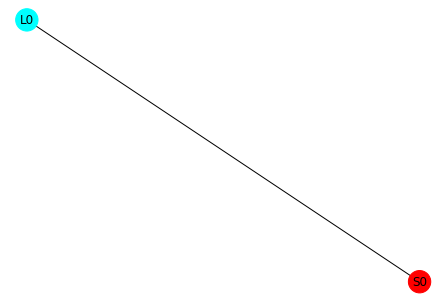

In [57]:
nviz.plot_soma_limb_concept_network(neuron_obj)